# Komentāri par 13.nod. MD.

#### Ņemot vērā daudzos jautājumus par it īpaši 7. uzd. izpildi, nolēmu uzrakstīt nelielu "teorētisko pamatojumu".

(Šo dokumenta formātu sauc par _Jupyter notebook_. Tajā var gan ērti rakstīt tekstu, gan _LaTeX_ formulas, gan kodu, gan attēlot grafikus.) 

Importēsim vajadzīgās paketes un izveidosim trokšņainu un gludu datu masīvus:

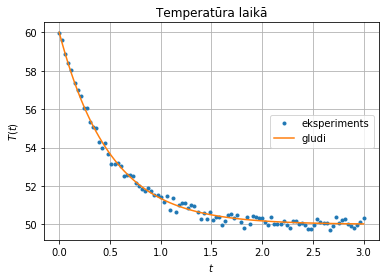

In [14]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 3, 100)

# ideāli dati / bez trokšņa (noderēs vēlāk)
T_gluds = 50 + 10 * np.exp(-2*t)

# pielieku klāt troksni, lai dati "eksperimentālāki"
T_exp = T_gluds + np.random.normal(scale=0.2, size=len(t))

plt.plot(t, T_exp, '.', label="eksperiments")
plt.plot(t, T_gluds, label="gludi")
plt.title("Temperatūra laikā")
plt.xlabel("$t$")
plt.ylabel("$T(t)$")
plt.legend(loc = "right")
plt.grid()

Ar aci redzams, ka dati varētu būt formā $T(t) = A + B e^{-kt}$, kur $A, B, k$ ir nezināmi koeficienti. 

No malas to gan vēl nezinām.

Izskatās, ka $T$ ar laiku nokrīt līdz "fona lielumam" (līdzsvara temperatūrai) $A$, kā jau dzišanā bieži gadās.

### Teorētiska atkāpe: Kā zināt, vai dati tiešām eksponenciāli ? 

Ja mums ir dota eksponenciāla funkcija formā $y(x) = C\ e^{\ Dt}$, mēs varam to logaritmēt:
$$
\ln{y} = \ln{(C\ e^{\ Dt})} = \ln C + \ln{e^{\ Dt}} = \ln C + Dt \\
$$

Iegūstam, ka $\ln y$ ir lineārs pret $t$ !

Pārbaudīsim, vai tā tiešām ir:

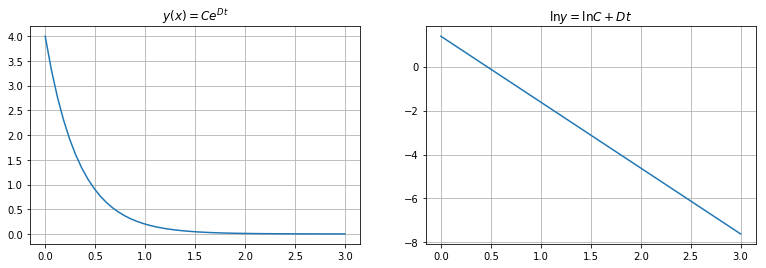

In [15]:
x = np.linspace(0,3)
C, D = 4, -3
y = C * np.exp(D * x)

fig, (asis1, asis2) = plt.subplots(1,2, figsize=(13,4))
asis1.set_title("$y(x) = C e^{Dt}$")
asis1.plot(x,y)
asis1.grid()

asis2.set_title("$\ln y = \ln C + Dt$")
asis2.plot(x, np.log(y))
asis2.grid()

### Redzam, ka eksponenciālu funkciju logaritmi tik tiešām ir lineāri pret to argumentiem !

#### Un šīs taisnes krustpunkts ar $\ln y$ asi ļauj noteikt koeficienta $C$ vērtību, bet slīpuma koeficients dod oriģinālas eksponentes kāpinātāja koeficientu $D$. 

### Ko darīt, ja dati nav "plika" eksponente ?

Ja dati ir formā $T(t) = A + B e^{-kt}$, tad vispirms ir maķenīt jāpastrādā, lai tiktu pie jau aplūkotās "plikās" eksponentes formas, veicot nelielas matemātiskas mahinācijas:

$$
T(t) = A + B e^{-kt} \\
T(t)-A=Be^{-kt}\\
\ln{[T(t)-A]} = \ln{Be^{-kt}} \\
\ln{[T(t)-A]} = \ln{B} + \ln{e^{-kt}} = \ln{B} - kt 
$$

mēs iegūstam lieluma, ko sauksim par $u = \ln{[T(t)-A]}$ lineāru atkarību no $t$.

Pārbaudīsim cik labi tas strādā, atceroties mūsu **gludo** masīvu $T_{gluds}$:

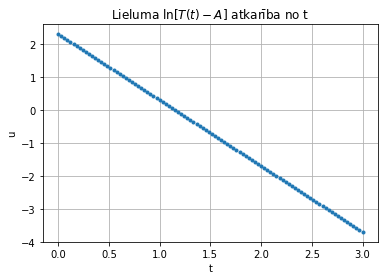

In [27]:
u = np.log(T_gluds - 50)

plt.plot(t, u, '.')
plt.title("Lieluma $\ln{[T(t) - A]}$ atkarība no t")
plt.xlabel("t")
plt.ylabel("u")
plt.grid()


### Logoritmēti dati sēž uz taisnes --> oriģinālie dati bija eksponente!


Līdzīgi ar trokšņainiem datiem:

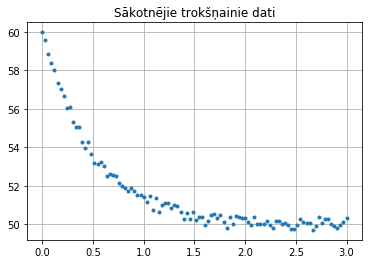

In [17]:
plt.title("Sākotnējie trokšņainie dati")
plt.plot(t, T_exp, '.')
plt.grid()

Uz aci varētu teikt, ka līdzsvara temperatūra (koeficients $A$ iepriekš) ir ap 50, so to atņemsim no mūsu datiem un tad visu logaritmēsim :)

In [18]:
u_exp = np.log(T_exp - 50)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


:( errors, jo daži datu punkti ir mazāki par $50$, tāpēc sanāk logaritmēt negatīvas vērtības, kas ir [ļoti nelegāli](https://en.wikipedia.org/wiki/Complex_logarithm).

Mēģināsim vienkārši atņemt mazāko $T_{exp}$ vērtību un pieskaitīt nelielu $\epsilon$, lai vienā brīdī neiznāk ņemt $\ln{0}$. 

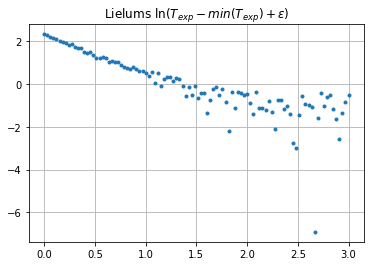

In [28]:
eps = 0.001
A = np.min(T_exp)
u_exp_better = np.log(T_exp - A + eps)

plt.title("Lielums $\ln {(T_{exp}- min(T_{exp}) + \epsilon )}$")
plt.plot(t, u_exp_better, '.')
plt.grid()

### Redzams, ka sākumā dati pavisam izteikti atrodas uz vienas taisnes. Vēlāk troksnis ievērojami bojā mūsu skaisto taisni.

Piedzīsim datus ar taisni līdz uz aci izvēlētai vērtībai $t=1.50 s$, jo pēc tam tie vairs neatrodas uz taisnes.

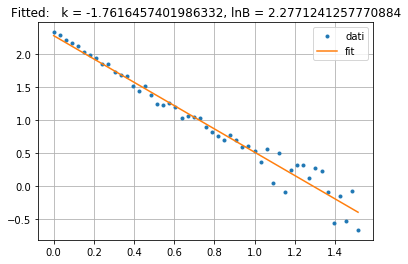

In [42]:
# oriģinālais laika masīvs bija 100 vienības garš un saturēja vērtības līdz t = 3.0s
# te attiecīgi ņemam līdz 50. elementam
end = 51

# mums noderēs līdz t=1.50s saīsināti masīvi 
t2 = t[:end]
u_exp_better2 = u_exp_better[:end]

# fitojam logaritmētos datus ar taisni
k, lnB = np.polyfit(t2, u_exp_better2, deg=1)

plt.plot(t2, u_exp_better2, '.', label="dati")
plt.plot(t2, k*t2 + lnB, label="fit")
plt.title("Fitted:   k = "+ str(k) + ", lnB = " + str(lnB))
plt.legend()
plt.grid()

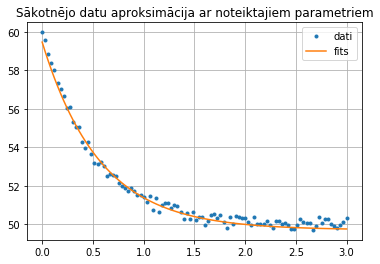

In [43]:
# atgūstam oriģinālo B vērtību, jo fits deva ārā "ln B"
B = np.exp(lnB)

plt.plot(t, T_exp, '.', label="dati")
plt.plot(t, A + B * np.exp(k * t), label="fits")

plt.title("Sākotnējo datu aproksimācija ar noteiktajiem parametriem")
plt.legend()
plt.grid()


Sākumā gludos datus būvējām ar $A = 50, B=10, k=-2$, te noteicām, ka parametru vērtības varētu būt:

In [22]:
print(A, B, k)

49.71237616587675 9.748604297387734 -1.7616457401986332


Diezgan ok. Prieka pēc attēlosim gan datus, gan ideālo līkni, gan fitoto līkni vienā grafikā:

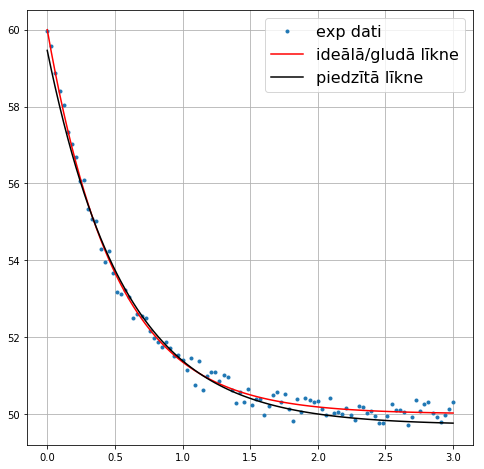

In [23]:
plt.figure(figsize=(8,8))
plt.plot(t, T_exp, '.', label="exp dati")
plt.plot(t, T_gluds, 'r-', label="ideālā/gludā līkne")
plt.plot(t,  A + B * np.exp(k * t), 'k-', label="piedzītā līkne")
plt.legend(fontsize=16)
plt.grid()

Ar aci pat grūti pateikt, kura līkne datus apraksta labāk, lai gan sarkanajai eksponentes kāpinātājā ir $k=-2$, bet melnajai $k=-1.725$.

## Resumé:
### - Vilkt no datiem ārā eksponenšu kāpinātāju rādītājus ir diezgan netriviāli.
### - Var noteikt, ka datu punkti sadalīti eksponenciāli, ja datu logaritmētie punkti atrodas uz taisnes. Tas bieži noder zinātnē :) 

#### Matemātisks bonuss

Vai līdzīgi eksponenciāliskumam var noteikt arī _power laws_ jeb $y(x) = M x^a$ ? 

Padarām logaritmus, tāpat kā iepriekš:
$$
\ln y = \ln {(M x^a)} = \ln M + a \ln x
$$

Ieviešot substitūcijas $\ln y = g$ un $\ln x = z$, redzam, ka atkal priekšā lineāra sakarība:
$$
g = \ln M + a z
$$

Patestēsim, vai atkal tiekam pie taisnes.

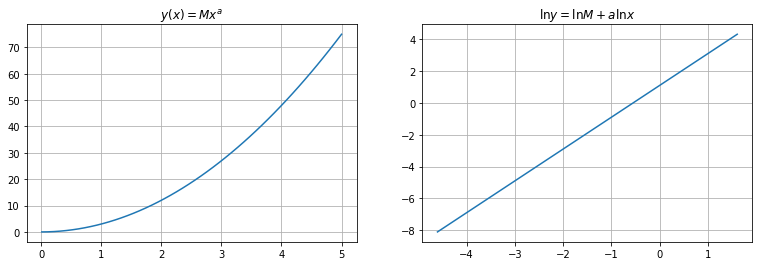

In [24]:
# pārbaudīsim some power law formā: y = 3 * x^2
M = 3
a = 2
xx = np.linspace(0.01, 5)
yy = M * xx**a

# šeit jālogaritmē arī neatkarīgā mainīgā vērtības, atšķirībā no eksponentes gadījuma!
xx_log = np.log(xx)
yy_log = a * np.log(xx) + np.log(M)

fig, (asis1, asis2) = plt.subplots(1,2, figsize=(13,4))
asis1.set_title("$y(x) = M x^a$")
asis1.plot(xx,yy)
asis1.grid()

asis2.set_title("$\ln y = \ln M + a \ln x $")
asis2.plot(xx_log, yy_log)
asis2.grid()

### Vai fitota taisne šeit jelko dod?

In [25]:
a_fit, lnM_fit = np.polyfit(xx_log, yy_log, deg=1)

In [26]:
print(a, M)
print()
print(a_fit, np.exp(lnM_fit))

2 3

1.9999999999999996 3.0000000000000004


:)